In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


EDA - 1:Bike Details Dataset

In [2]:
df=pd.read_csv("BIKE DETAILS.csv")

In [3]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [4]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [5]:
df.isna().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

1. What is the range of selling prices in the dataset?

In [6]:

# Print the range of selling prices
print("Selling Price Range:", df['selling_price'].min(), "to", df['selling_price'].max())


Selling Price Range: 5000 to 760000


<function matplotlib.pyplot.show(close=None, block=None)>

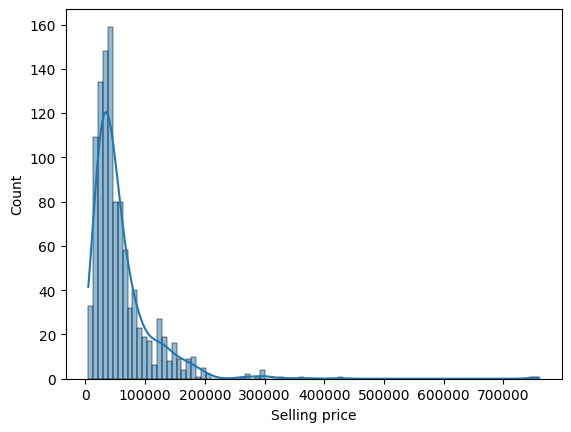

In [7]:
#histogram for the range of selling prise
sns.histplot(x="selling_price",data=df,kde=True)
plt.xlabel("Selling price")
plt.show


2. What is the median selling price for bikes in the dataset?

In [8]:
# Calculate the median selling price
median_selling_price = df['selling_price'].median()
median_selling_price


np.float64(45000.0)

3. What is the most common seller type?

In [9]:
# Find the most common seller type
most_common_seller = df['seller_type'].mode()[0]
print(f"Most Common Seller Type: {most_common_seller}")


Most Common Seller Type: Individual


In [10]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

4. How many bikes have driven more than 50,000 kilometers.

In [11]:
highest_km_driven=(df.km_driven>50000).sum()

In [12]:
print(f"Number of bikes driven more than 50,000 km: {highest_km_driven}")

Number of bikes driven more than 50,000 km: 170


5. What is the average km_driven value for each ownership type?

In [13]:
# Calculate average km_driven for each ownership type
avg_km_per_owner = df.groupby("owner")["km_driven"].mean()

print(avg_km_per_owner)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6. What proportion of bikes are from the year 2015 or older?

In [14]:
# Count total bikes
total_bikes = len(df)

# Count bikes from 2015 or older
old_bikes_count = (df["year"] <= 2015).sum()

# Calculate the proportion
proportion_old_bikes = old_bikes_count / total_bikes

print(f"Proportion of bikes from 2015 or older: {proportion_old_bikes:.2%}")

Proportion of bikes from 2015 or older: 56.64%


7. What is the trend of missing values across the dataset?

In [15]:
# check the missing value
missing_values=df.isnull().sum()
print("missing values are:")
print(missing_values)

missing values are:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


8. What is the highest ex_showroom_price recorded, and for which bike?

In [16]:
# Remove rows with missing ex_showroom_price
df_cleaned = df.dropna(subset=["ex_showroom_price"])

# Find the bike with the highest ex_showroom_price
max_price_bike = df_cleaned.loc[df_cleaned["ex_showroom_price"].idxmax()]

print(f"Highest ex-showroom price: {max_price_bike['ex_showroom_price']}")
print(f"Bike model: {max_price_bike['name']}")

Highest ex-showroom price: 1278000.0
Bike model: Harley-Davidson Street Bob


9. What is the total number of bikes listed by each seller type?

In [17]:
# Count bikes per seller type

seller_counts = df["seller_type"].value_counts()

print("Total bikes listed by each seller type:")
print(seller_counts)

Total bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


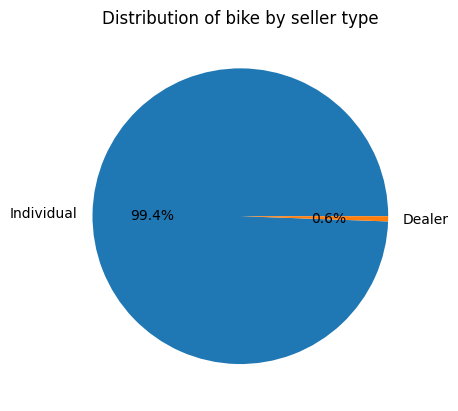

In [18]:
# pie chart of Distribution of bike by seller type

seller_counts.plot(kind="pie",autopct="%1.1f%%")
plt.title("Distribution of bike by seller type")
plt.ylabel("")
plt.show()

10. What is the relationship between selling_price and km_driven for first-owner bikes?

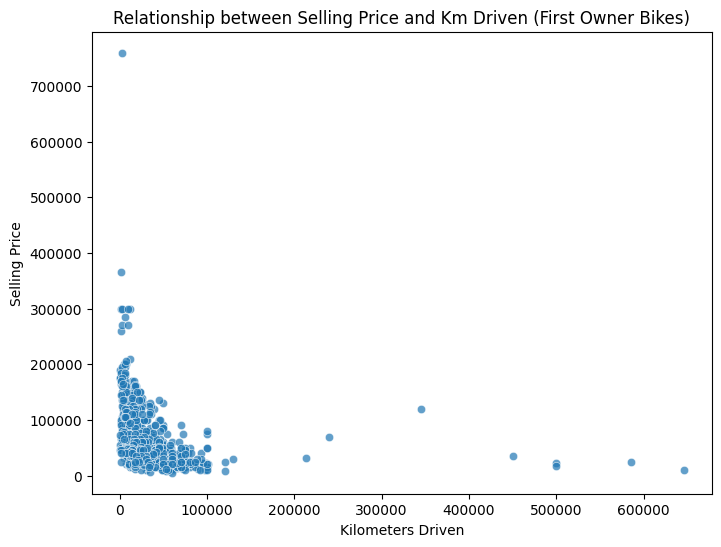

In [19]:
# Filter data for first-owner bikes
first_owner_bikes = df[df["owner"] == "1st owner"]

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=first_owner_bikes["km_driven"], y=first_owner_bikes["selling_price"], alpha=0.7)

plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Relationship between Selling Price and Km Driven (First Owner Bikes)")

plt.show()

In [20]:
# The scatter plot shows how selling price changes as bikes accumulate more kilometers.
# If there's a downward trend, it suggests higher mileage tends to reduce selling price.
# If the points are spread out randomly, there may not be a strong correlation.




11. Identify and remove outliers in the km_driven column using the IQR method.

In [21]:
# Calculate IQR
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_cleaned = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_cleaned)}")

Original dataset size: 1061
Cleaned dataset size: 1022


12. Perform a bivariate analysis to visualize the relationship between year and selling_price?

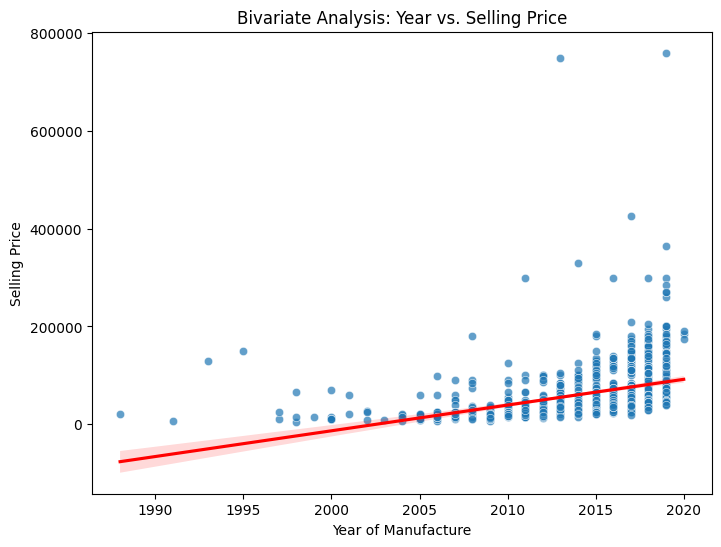

In [22]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["year"], y=df["selling_price"], alpha=0.7)

# Add a regression line for trend analysis
sns.regplot(x=df["year"], y=df["selling_price"], scatter=False, color="red")

plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.title("Bivariate Analysis: Year vs. Selling Price")

plt.show()

13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [23]:
# Calculate the bike's age (assuming the current year is 2025)
df["bike_age"] = 2025 - df["year"]

# Calculate depreciation per year
df["depreciation_per_year"] = df["selling_price"] / df["bike_age"]

# Compute the average depreciation across all bikes
avg_depreciation = df["depreciation_per_year"].mean()

print(f"Average depreciation per year: {avg_depreciation:.2f}")

Average depreciation per year: 7001.30


14. Which bike names are priced significantly above the average price for their manufacturing year?

In [24]:
# Compute the average selling price per year
avg_price_year = df.groupby("year")["selling_price"].mean()

# Flag bikes that are at least 30% higher than their year's average price
df["avg_price_for_year"] = df["year"].map(avg_price_year)
high_priced_bikes = df[df["selling_price"] > 1.3 * df["avg_price_for_year"]]

# Show the results
print(high_priced_bikes[["name", "year", "selling_price"]])

                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
18     Royal Enfield Classic Gunmetal Grey  2018         150000
...                                    ...   ...            ...
981              Royal Enfield Thunder 350  2013         105000
983              Royal Enfield Classic 350  2015         100000
984              Royal Enfield Classic 500  2014          95000
985              Royal Enfield Classic 500  2011          90000
1008                    Bajaj Pulsar 220 F  2012          52000

[203 rows x 3 columns]


15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

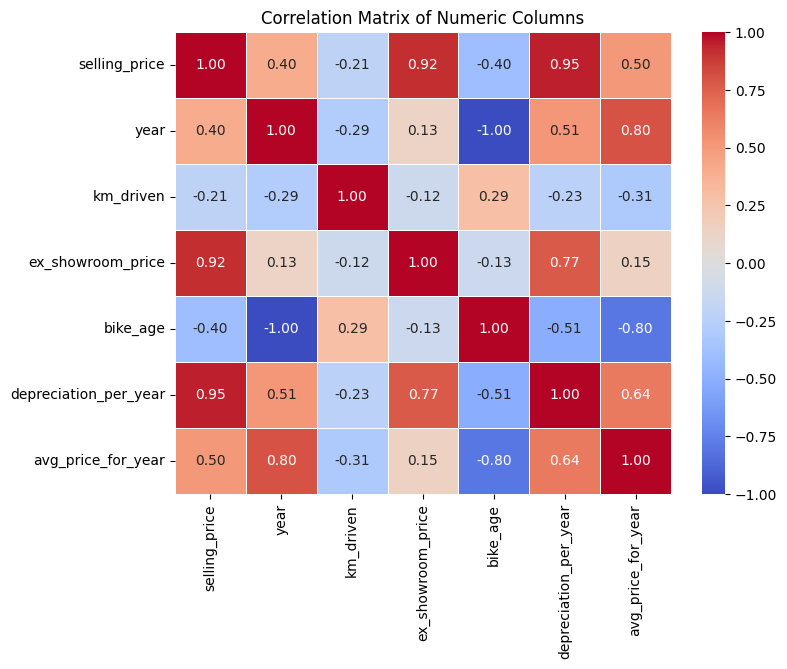

In [25]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Numeric Columns")
plt.show()

EDA-2: Car Sale Dataset

In [26]:
df=pd.read_csv("Car Sale.csv")

In [27]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [28]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

Average selling price for each dealer:
Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27

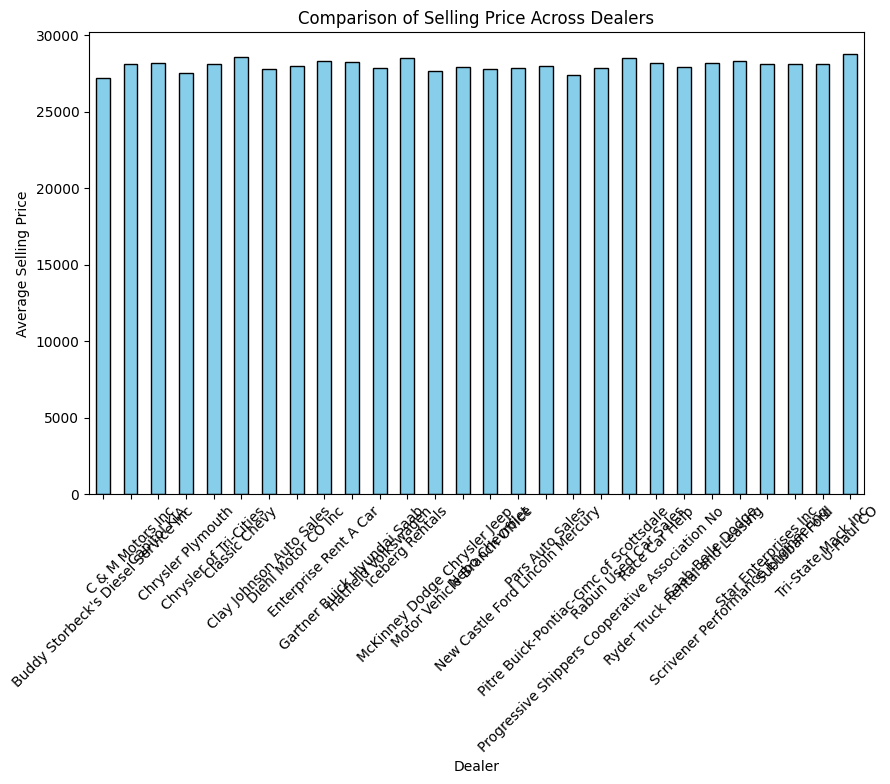

In [29]:
# Compute the average selling price per dealer
avg_price_per_dealer = df.groupby("Dealer_Name")["Price ($)"].mean()

# Display results
print("Average selling price for each dealer:")
print(avg_price_per_dealer)

# Visualize dealer-wise selling price comparison
plt.figure(figsize=(10, 6))
avg_price_per_dealer.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Dealer")
plt.ylabel("Average Selling Price")
plt.title("Comparison of Selling Price Across Dealers")
plt.xticks(rotation=45)
plt.show()

2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

In [30]:
# Calculate price variation (standard deviation) for each car brand
price_variation = df.groupby("Company")["Price ($)"].std()

# Find the brand with the highest variation
highest_variation_brand = price_variation.idxmax()
highest_variation_value = price_variation.max()

print(f"The brand with the highest price variation is {highest_variation_brand}, with a standard deviation of {highest_variation_value:.2f}.")
print("\nPrice variation for each brand:")
print(price_variation)

The brand with the highest price variation is Lincoln, with a standard deviation of 19658.05.

Price variation for each brand:
Company
Acura          8183.046414
Audi          12904.243867
BMW           15065.578723
Buick         17142.232626
Cadillac      19517.120220
Chevrolet     13311.063223
Chrysler      11583.286811
Dodge         11187.592085
Ford          15849.090227
Honda         11148.629062
Hyundai        3485.982649
Infiniti      13696.332844
Jaguar        10222.531533
Jeep           9459.834418
Lexus         17852.923492
Lincoln       19658.050211
Mercedes-B    15722.807459
Mercury       16445.172195
Mitsubishi    11671.343035
Nissan        16214.264017
Oldsmobile    15711.345857
Plymouth      19065.997338
Pontiac       14348.963592
Porsche        5261.839206
Saab          19653.740089
Saturn        15990.223671
Subaru        12920.771620
Toyota        15367.131714
Volkswagen    12527.124011
Volvo         12933.790185
Name: Price ($), dtype: float64


In [31]:
# High variation indicates that a brand sells cars across a wide price range, from budget-friendly to luxury models.
# Low variation means prices are more consistent, suggesting a brand focuses on a particular market segment.
# Luxury brands tend to have higher price variation due to models ranging from base to high-performance versions.

3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

In [32]:
# Compute IQR for each transmission type
transmission_groups = df.groupby("Transmission")["Price ($)"]
Q1 = transmission_groups.quantile(0.25)
Q3 = transmission_groups.quantile(0.75)
IQR = Q3 - Q1

# Display results
iqr_df = pd.DataFrame({"Q1": Q1, "Q3": Q3, "IQR": IQR})
print("Interquartile Range (IQR) for each transmission type:")
print(iqr_df)

Interquartile Range (IQR) for each transmission type:
                   Q1       Q3      IQR
Transmission                           
Auto          19000.0  35500.0  16500.0
Manual        17000.0  34000.0  17000.0


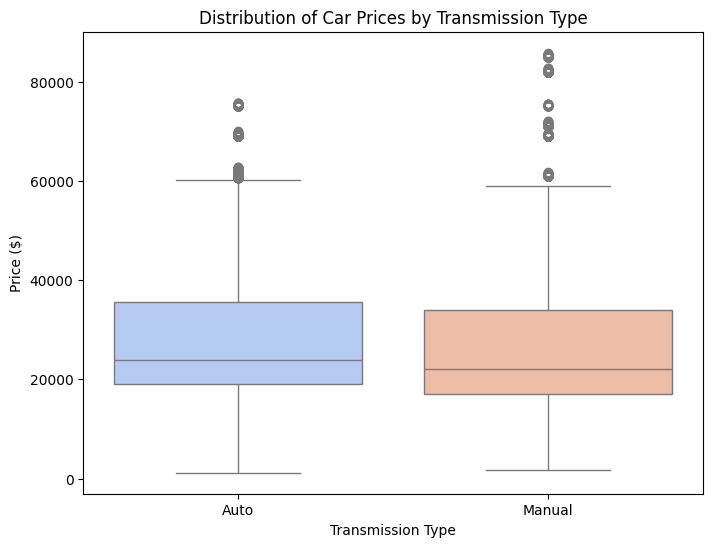

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for price distribution by transmission type
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Transmission"], y=df["Price ($)"], palette="coolwarm")

plt.xlabel("Transmission Type")
plt.ylabel("Price ($)")
plt.title("Distribution of Car Prices by Transmission Type")
plt.show()

4. What is the distribution of car prices across different regions?

In [34]:
# Compute average price per region
avg_price_region = df.groupby("Dealer_Region")["Price ($)"].mean()

# Display results
print("Average car price per region:")
print(avg_price_region)

Average car price per region:
Dealer_Region
Aurora        28334.626837
Austin        28341.603628
Greenville    28180.819054
Janesville    27833.350955
Middletown    27856.338875
Pasco         28119.039923
Scottsdale    27954.958928
Name: Price ($), dtype: float64


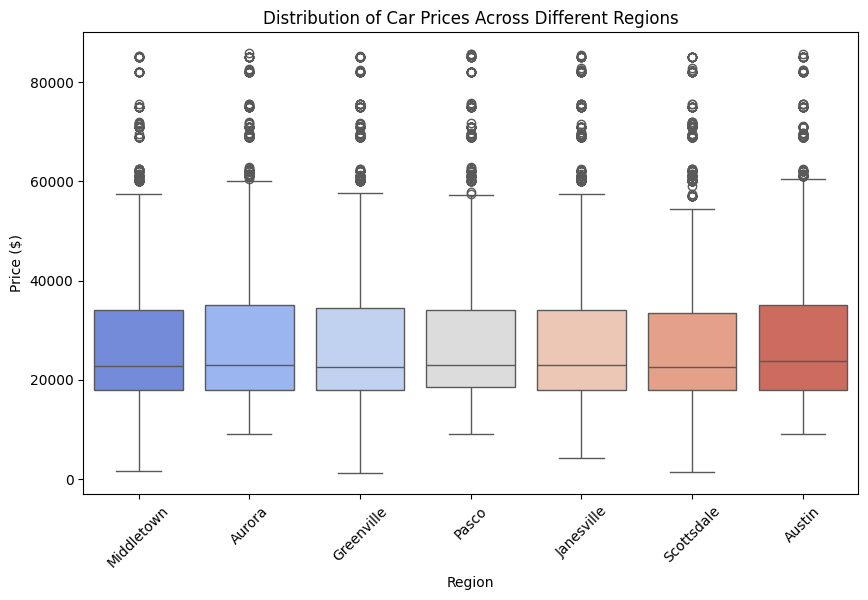

In [35]:


# Create a boxplot for price distribution by region
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Dealer_Region"], y=df["Price ($)"], palette="coolwarm")

plt.xlabel("Region")
plt.ylabel("Price ($)")
plt.title("Distribution of Car Prices Across Different Regions")
plt.xticks(rotation=45)
plt.show()

5.What is the distribution of cars based on body styles?

Car count for each body style:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


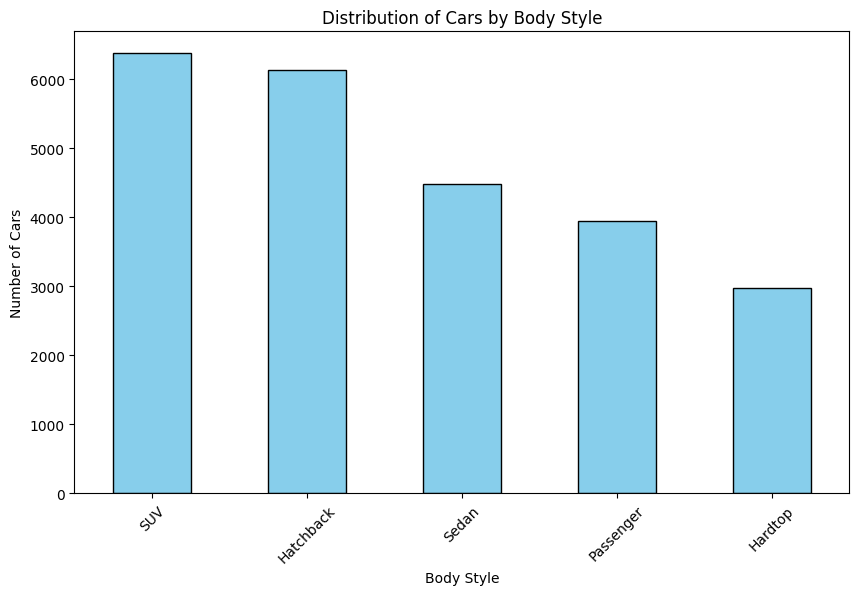

In [36]:
# Count the number of cars for each body style
body_style_counts = df["Body Style"].value_counts()

# Display results
print("Car count for each body style:")
print(body_style_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
body_style_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Body Style")
plt.ylabel("Number of Cars")
plt.title("Distribution of Cars by Body Style")
plt.xticks(rotation=45)
plt.show()

6.How does the average selling price of cars vary by customer gender and annual income?

In [37]:
# Compute the average selling price for each gender
avg_price_gender = df.groupby("Gender")["Price ($)"].mean()

# Display results
print("Average selling price by gender:")
print(avg_price_gender)

Average selling price by gender:
Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64


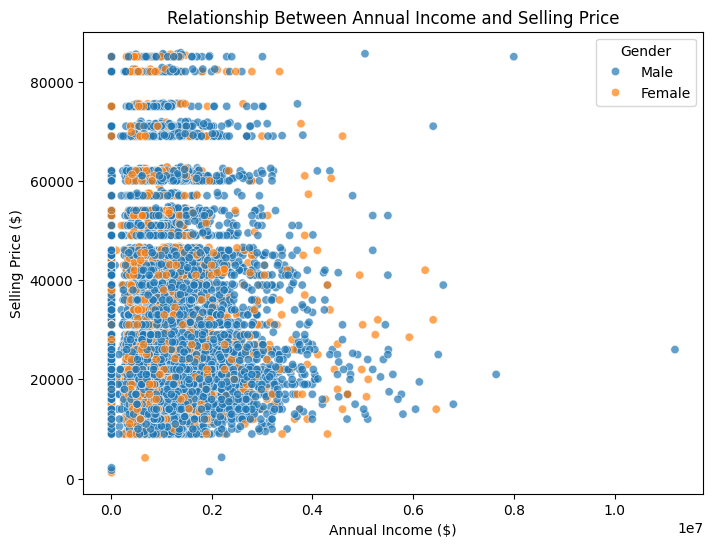

In [38]:
# Create a scatter plot to visualize relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Annual Income"], y=df["Price ($)"], hue=df["Gender"], alpha=0.7)

plt.xlabel("Annual Income ($)")
plt.ylabel("Selling Price ($)")
plt.title("Relationship Between Annual Income and Selling Price")
plt.legend(title="Gender")
plt.show()

In [39]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [40]:
# Compute average price per region
avg_price_region = df.groupby("Dealer_Region")["Price ($)"].mean()

# Compute the number of cars sold per region
cars_sold_region = df["Dealer_Region"].value_counts()

# Display results
print("Average car price per region:")
print(avg_price_region)
print("\nNumber of cars sold per region:")
print(cars_sold_region)

Average car price per region:
Dealer_Region
Aurora        28334.626837
Austin        28341.603628
Greenville    28180.819054
Janesville    27833.350955
Middletown    27856.338875
Pasco         28119.039923
Scottsdale    27954.958928
Name: Price ($), dtype: float64

Number of cars sold per region:
Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


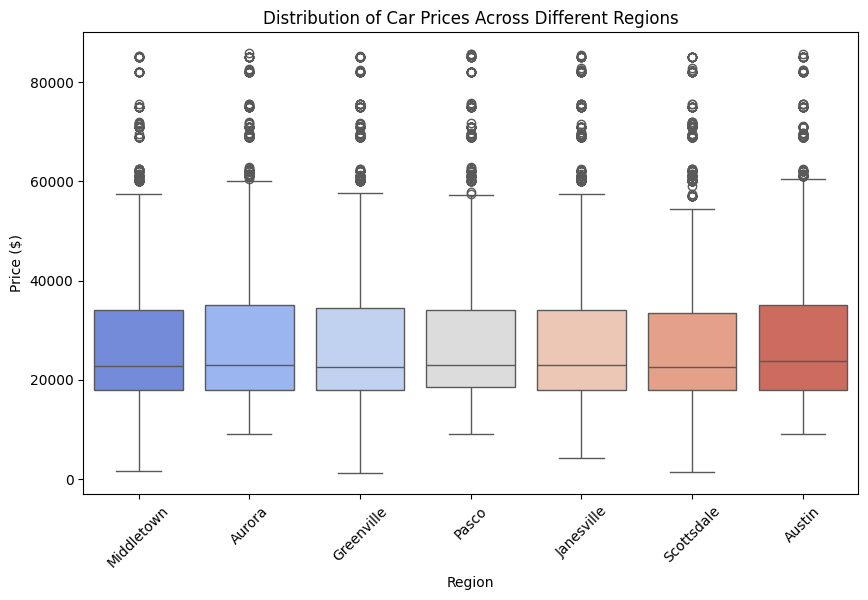

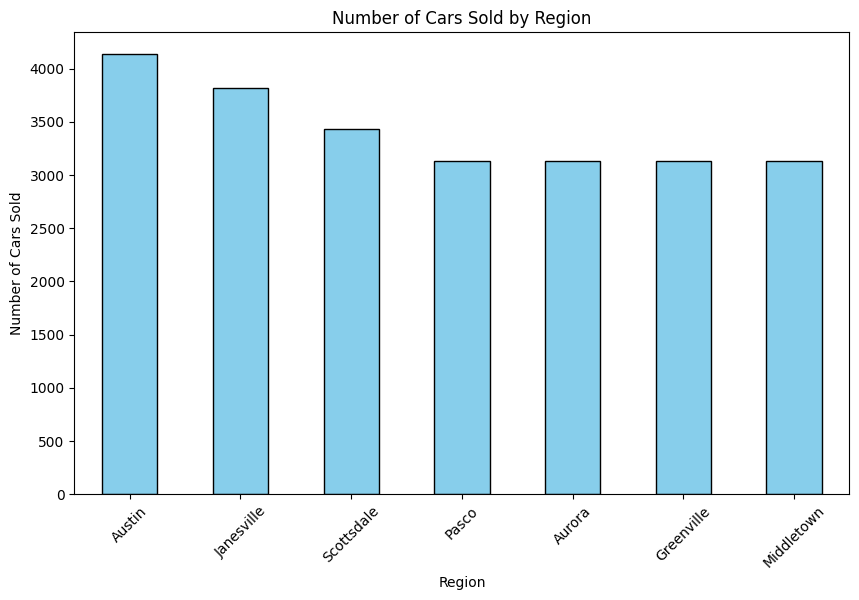

In [41]:
# Boxplot for price distribution by region
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Dealer_Region"], y=df["Price ($)"], palette="coolwarm")
plt.xlabel("Region")
plt.ylabel("Price ($)")
plt.title("Distribution of Car Prices Across Different Regions")
plt.xticks(rotation=45)
plt.show()

# Bar chart for number of cars sold per region
plt.figure(figsize=(10, 6))
cars_sold_region.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Region")
plt.ylabel("Number of Cars Sold")
plt.title("Number of Cars Sold by Region")
plt.xticks(rotation=45)
plt.show()

8. How does the average car price differ between cars with different engine sizes?

In [42]:
avg_price_engine= df.groupby("Engine")["Price ($)"].mean() 

In [43]:
print("average car price by engine size :")
print(avg_price_engine)

average car price by engine size :
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


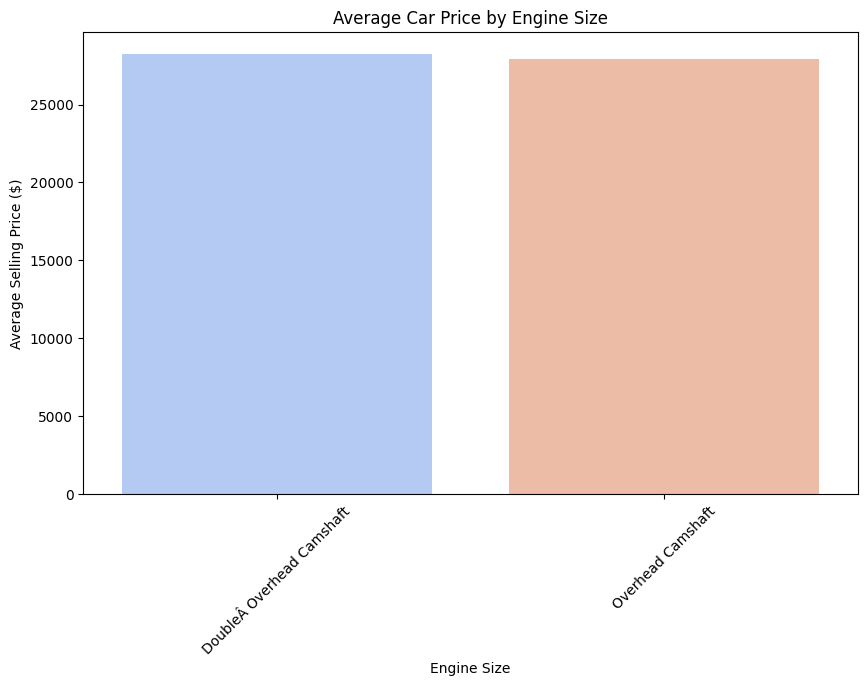

In [44]:
# Create a bar chart for engine size vs. price
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_engine.index, y=avg_price_engine.values, palette="coolwarm")

plt.xlabel("Engine Size")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Car Price by Engine Size")
plt.xticks(rotation=45)
plt.show()

In [45]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

9. How do car prices vary based on the customer’s annual income bracket?

In [46]:
# Define income brackets
bins = [0,60000, 100000, 200000, 500000]  # Adjust as needed
labels = ["Low", "Middle", "Upper-Middle", "High"]
df["Income Bracket"] = pd.cut(df["Annual Income"], bins=bins, labels=labels)

# Compute the average car price per income bracket
avg_price_income = df.groupby("Income Bracket")["Price ($)"].mean()

# Display results
print("Average car price per income bracket:")
print(avg_price_income)

Average car price per income bracket:
Income Bracket
Low             27884.297820
Middle          43000.000000
Upper-Middle    22833.666667
High            28602.538321
Name: Price ($), dtype: float64


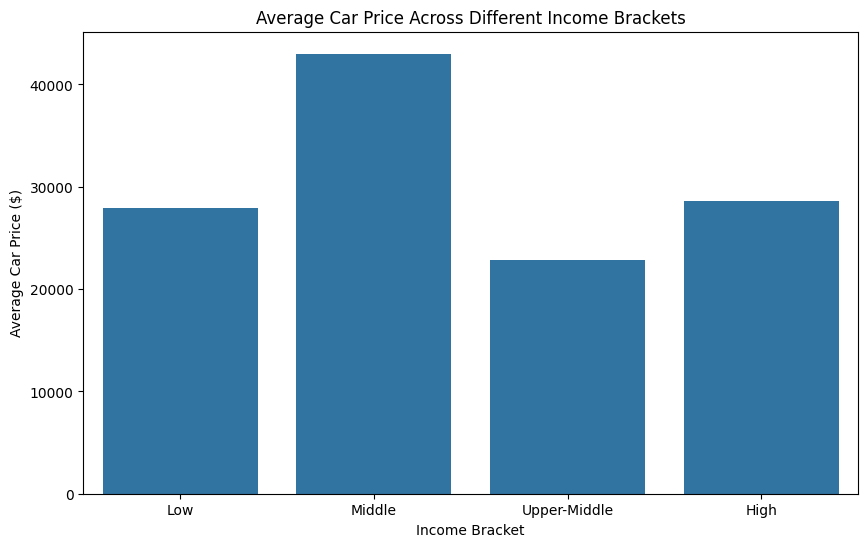

In [47]:
# Create a bar chart for income bracket vs. car price
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_income.index, y=avg_price_income.values)

plt.xlabel("Income Bracket")
plt.ylabel("Average Car Price ($)")
plt.title("Average Car Price Across Different Income Brackets")
plt.show()

10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [48]:
#top 5 car models with the highest number of sales

top_models=df["Model"].value_counts().head(5)
print("top 5 car models with the highest number of sales:")
print(top_models)

top 5 car models with the highest number of sales:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


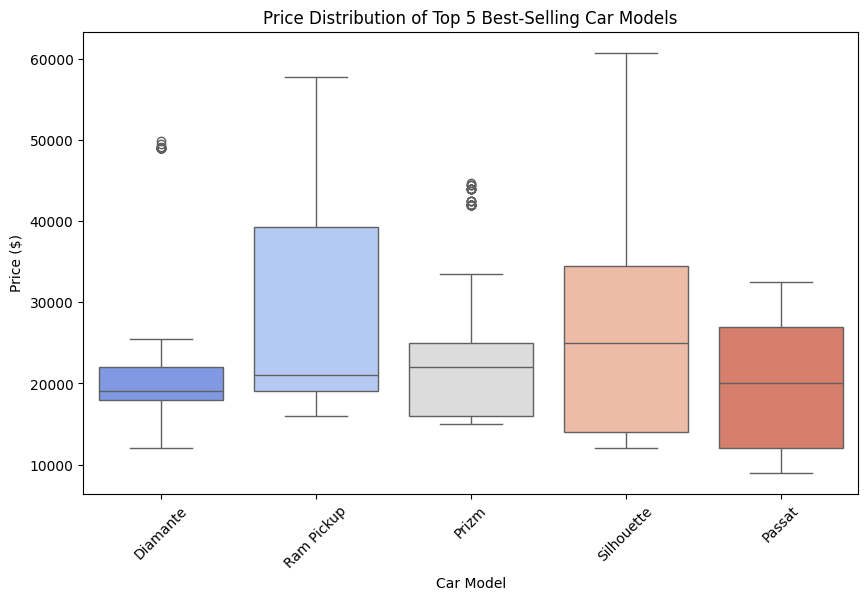

In [49]:
# Filter dataset for only the top 5 models
top_models_list = top_models.index
filtered_df = df[df["Model"].isin(top_models_list)]

# Create a boxplot to show price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df["Model"], y=filtered_df["Price ($)"], palette="coolwarm")

plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.title("Price Distribution of Top 5 Best-Selling Car Models")
plt.xticks(rotation=45)
plt.show()

In [50]:
#The first step identifies the top 5 car models based on sales.
# The boxplot shows how prices vary for these models—whether they have a wide range (luxury trims) or are consistent (budget models).
# Outliers may indicate special editions or high-end variants.




11. How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

In [51]:
# Compute standard deviation of car prices for each color
price_variation_color = df.groupby("Color")["Price ($)"].std()

# Find the color with the highest price variation
highest_variation_color = price_variation_color.idxmax()
highest_variation_value = price_variation_color.max()

print(f"The color with the highest price variation is {highest_variation_color}, with a standard deviation of {highest_variation_value:.2f}.")
print("\nPrice variation for each color:")
print(price_variation_color)

The color with the highest price variation is Red, with a standard deviation of 15519.36.

Price variation for each color:
Color
Black         15286.065976
Pale White    14077.346859
Red           15519.360962
Name: Price ($), dtype: float64


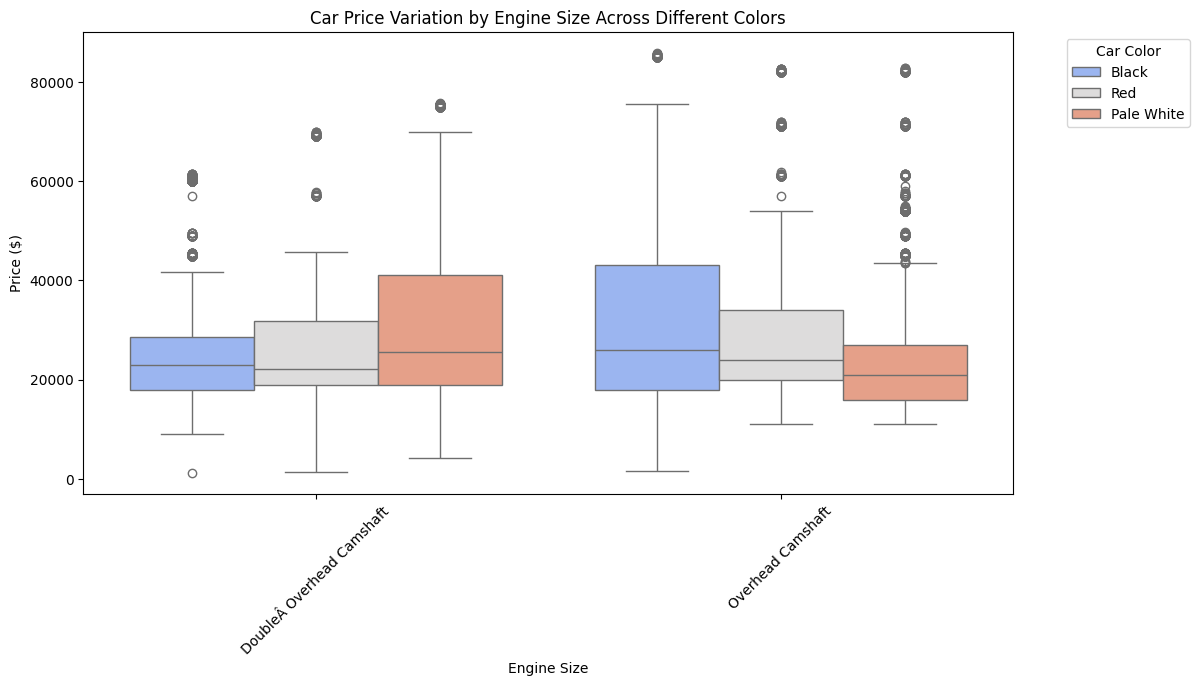

In [52]:
# Create a boxplot to show price distribution by engine size and color
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Engine"], y=df["Price ($)"], hue=df["Color"], palette="coolwarm")

plt.xlabel("Engine Size")
plt.ylabel("Price ($)")
plt.title("Car Price Variation by Engine Size Across Different Colors")
plt.xticks(rotation=45)
plt.legend(title="Car Color", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [53]:

# Higher engine sizes tend to have higher prices, especially for performance or luxury vehicles.
# Certain colors may have higher price variation, possibly due to demand, rarity, or premium finishes.
# The boxplot will visually highlight how pricing shifts across different engine sizes and colors.


12. Is there any seasonal trend in car sales based on the date of sale?

In [54]:
# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Extract month and year
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

# Compute total sales per month
monthly_sales = df.groupby(["Year", "Month"]).size().reset_index(name="Total Sales")

# Display results
print("Monthly car sales trend:")
print(monthly_sales)

Monthly car sales trend:
    Year  Month  Total Sales
0   2022      1          315
1   2022      2          320
2   2022      3          705
3   2022      4          800
4   2022      5          750
5   2022      6          690
6   2022      7          700
7   2022      8          810
8   2022      9         1475
9   2022     10          835
10  2022     11         1620
11  2022     12         1625
12  2023      1          475
13  2023      2          415
14  2023      3          830
15  2023      4          855
16  2023      5         1145
17  2023      6         1025
18  2023      7         1025
19  2023      8          895
20  2023      9         1830
21  2023     10          995
22  2023     11         1850
23  2023     12         1921


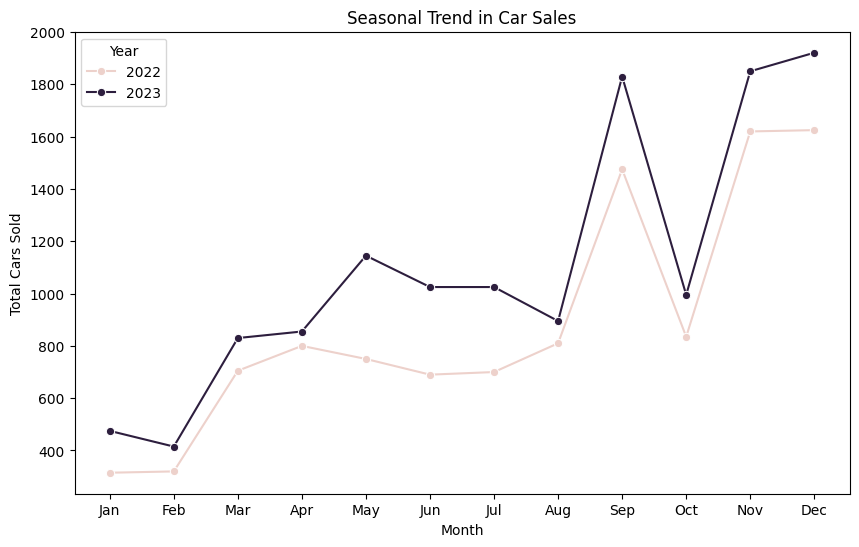

In [55]:
# Create a line plot for monthly sales trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales["Month"], y=monthly_sales["Total Sales"], hue=monthly_sales["Year"], marker="o")

plt.xlabel("Month")
plt.ylabel("Total Cars Sold")
plt.title("Seasonal Trend in Car Sales")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.show()

13.How does the car price distribution change when considering different combinations of body style and
transmission type?

In [56]:
# Compute average price for each combination of body style and transmission type
avg_price_combination = df.groupby(["Body Style", "Transmission"])["Price ($)"].mean()

# Display results
print("Average car price for each body style and transmission type:")
print(avg_price_combination)

Average car price for each body style and transmission type:
Body Style  Transmission
Hardtop     Auto            31520.188210
            Manual          27016.943698
Hatchback   Auto            25910.544824
            Manual          28702.550562
Passenger   Auto            28915.835149
            Manual          28969.521039
SUV         Auto            27501.404407
            Manual          26079.019161
Sedan       Auto            29955.294344
            Manual          29664.271572
Name: Price ($), dtype: float64


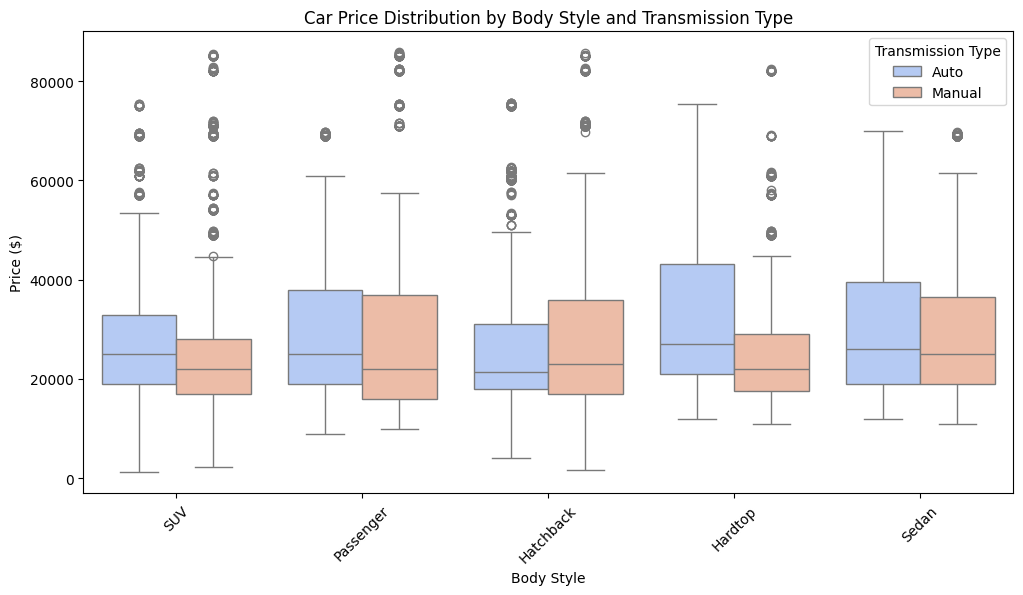

In [57]:
# Create a boxplot for price distribution by body style and transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Body Style"], y=df["Price ($)"], hue=df["Transmission"], palette="coolwarm")

plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xticks(rotation=45)
plt.legend(title="Transmission Type")
plt.show()

In [58]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket', 'Month', 'Year'],
      dtype='object')

14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

In [59]:
df["Engine"].unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [60]:
correlation_data = df[["Price ($)", "Annual Income"]]
correlation_matrix = correlation_data.corr()
print(correlation_matrix)

               Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000


In [61]:
# Since Engine isn't numeric, direct correlation doesn't work.

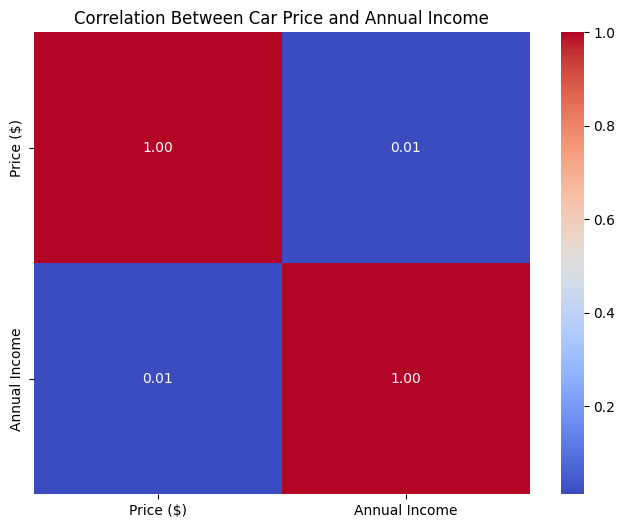

In [62]:
# Create a heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Between Car Price and Annual Income")
plt.show()

15. How does the average car price vary across different car models and engine types?

In [63]:
# Compute the average selling price for each car model and engine type
avg_price_model_engine = df.groupby(["Model", "Engine"])["Price ($)"].mean()

# Display results
print("Average selling price by car model and engine type:")
print(avg_price_model_engine)

Average selling price by car model and engine type:
Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


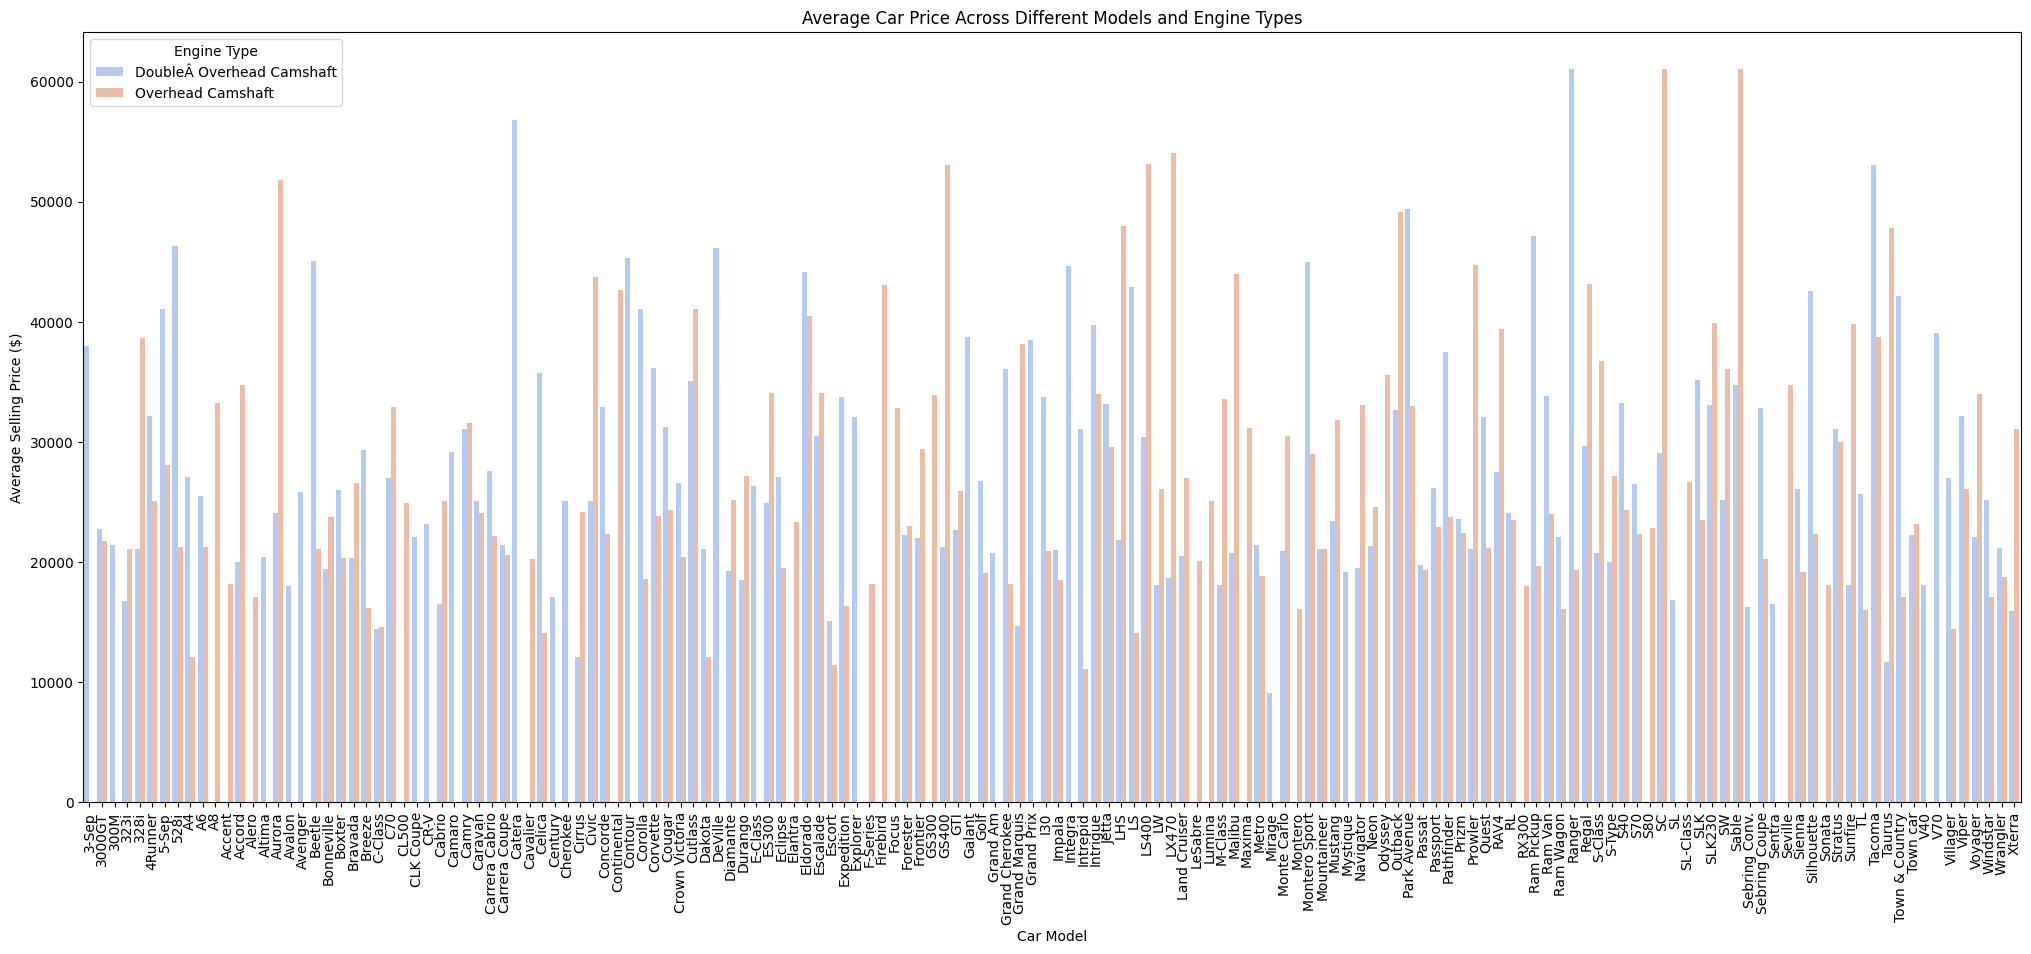

In [64]:
# Reset index for easier plotting
avg_price_df = avg_price_model_engine.reset_index()

# Create a bar chart for model vs. price, grouped by engine type
plt.figure(figsize=(25, 10))
sns.barplot(x=avg_price_df["Model"], y=avg_price_df["Price ($)"], hue=avg_price_df["Engine"], palette="coolwarm")

plt.xlabel("Car Model")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Car Price Across Different Models and Engine Types")
plt.xticks(rotation=90)
plt.legend(title="Engine Type", loc="upper left")
plt.show()

EDA 3: Amazon sales data

In [65]:
df=pd.read_csv("amazon.csv")

In [66]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [67]:
df.shape

(1465, 16)

In [68]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

1.What is the average rating for each product category?

In [69]:
df["rating"]=pd.to_numeric(df["rating"],errors="coerce")

In [70]:

# Compute the average rating for each product category
avg_rating_category = df.groupby("category")["rating"].mean()

# Display results
print("Average rating for each product category:")
print(avg_rating_category)

Average rating for each product category:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProduc

2.What are the top rating_count products by category?

In [71]:
df["rating_count"]=pd.to_numeric(df["rating_count"],errors="coerce")

In [72]:
# Group by category and find the top products by rating count
top_products = df.groupby("category").apply(lambda x: x.nlargest(1, "rating_count"))

# Display the results
print(top_products[["category", "product_name", "rating_count"]])

                                                                                                  category  \
category                                                                                                     
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
Computers&Accessories|Accessories&Peripherals|A... 695   Computers&Accessories|Accessories&Peripherals|...   
Computers&Accessories|Accessories&Peripherals|A... 906   Computers&Accessories|Accessories&Peripherals|...   
Computers&Accessories|Accessories&Peripherals|A... 748   Computers&Accessories|Accessories&Peripherals|...   
Computers&Accessories|Accessories&Peripherals|A... 844   Computers&Accessories|Accessories&Peripherals|...   
...                                                                                                    ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
OfficeProd

3.What is the distribution of discounted prices vs. actual prices?

In [73]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [74]:
# Clean price columns: remove '₹' and commas, then convert to float
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)


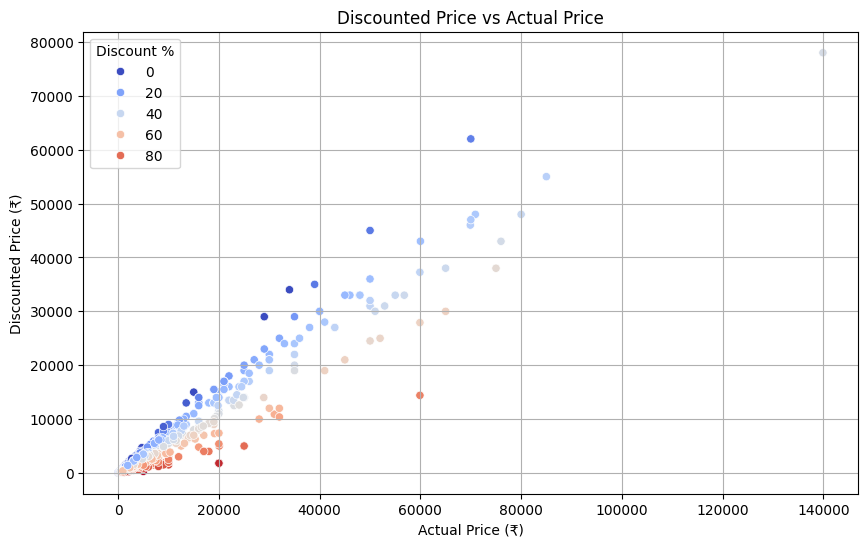

In [75]:
# Calculate discount and discount percentage
df['discount'] = df['actual_price'] - df['discounted_price']
df['discount_percent'] = (df['discount'] / df['actual_price']) * 100

# Plot: Discounted Price vs Actual Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='actual_price', y='discounted_price', hue='discount_percent', palette='coolwarm')
plt.title('Discounted Price vs Actual Price')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Discounted Price (₹)')
plt.grid(True)
plt.legend(title='Discount %')

plt.show()


4.How does the average discount percentage vary across categories?

In [76]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'discount',
       'discount_percent'],
      dtype='object')

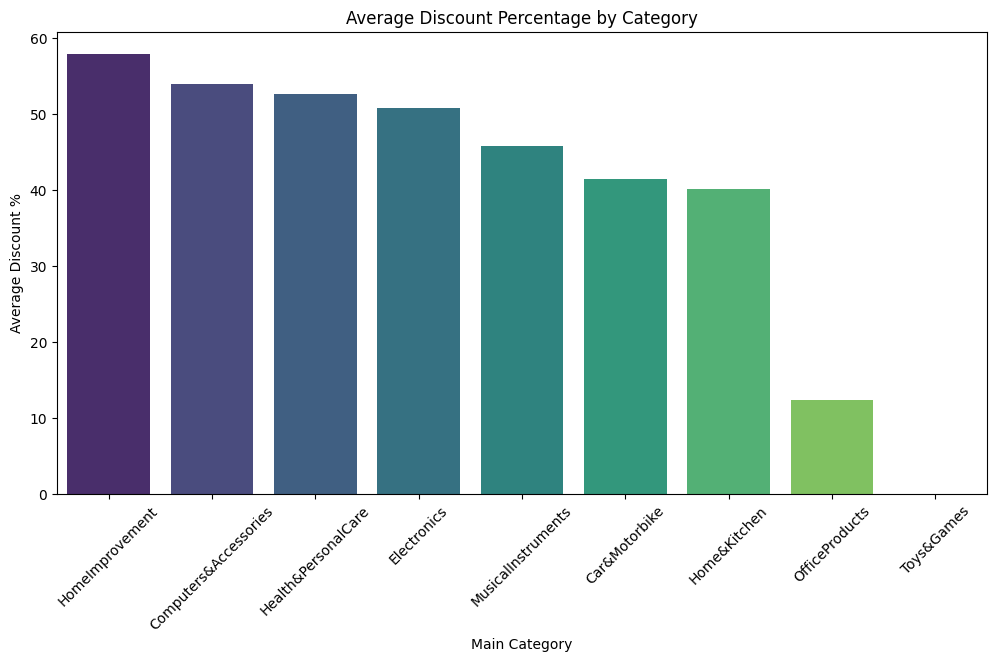

In [77]:
# The 'category' column contains hierarchical categories separated by '|'
# We'll extract the top-level category (first segment before '|')
df['main_category'] = df['category'].str.split('|').str[0]

# Group by main_category and calculate the average discount percentage
avg_discount_by_category = df.groupby('main_category')['discount_percent'].mean().reset_index()

# Sort values for better visualization
avg_discount_by_category = avg_discount_by_category.sort_values(by='discount_percent', ascending=False)

# Plot the average discount percentage across main categories
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_discount_by_category, x='main_category', y='discount_percent', palette='viridis')
plt.title('Average Discount Percentage by Category')
plt.xlabel('Main Category')
plt.ylabel('Average Discount %')
plt.xticks(rotation=45)
plt.show()


5.What are the most popular product names?

In [78]:

# Select only the required columns
df_copy = df[["product_name", "rating_count"]]

# Drop missing values and sort by rating count
df_copy = df.dropna().sort_values("rating_count", ascending=False)

# Display the top 10 most popular products
print(df_copy.head(10))

      product_id                                       product_name  \
750   B00ZRBWPA0       Eveready Red 1012 AAA Batteries - Pack of 10   
1059  B09Y5FZK9N  Pigeon 1.5 litre Hot Kettle and Stainless Stee...   
151   B08QSDKFGQ  Zoul USB Type C Fast Charging 3A Nylon Braided...   
823   B08QSC1XY8  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
32    B08QSC1XY8  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
1272  B09N3BFP4M  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...   
1259  B0BCKJJN8R  Hindware Atlantic Xceed 5L 3kW Instant Water H...   
214   B0841KQR1Z  Crypo™ Universal Remote Compatible with Tata S...   
1262  B08C7TYHPB  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...   
147   B09CMQRQM6  Ambrane Fast 100W Output Cable with Type-C to ...   

                                               category  discounted_price  \
750   Electronics|GeneralPurposeBatteries&BatteryCha...             159.0   
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...         

6.What are the most popular product keywords?

In [79]:
from collections import Counter
import re

# Join all product names into one string
text = ' '.join(df['product_name'].dropna()).lower()

# Remove symbols and split into words
words = re.findall(r'\b\w+\b', text)

# Basic stopwords list (manually defined)
stopwords = {'for', 'with', 'and', 'the', 'of', 'to', 'in', 'a', 'on', 'is', 'by', 'at'}

# Remove stopwords and short words
keywords = [word for word in words if word not in stopwords and len(word) > 2]

# Count most common keywords
top_keywords = Counter(keywords).most_common(20)

# Print results
for word, count in top_keywords:
    print(f"{word}: {count}")


black: 530
usb: 417
cable: 414
charging: 247
type: 243
fast: 212
smart: 175
white: 170
compatible: 146
data: 136
led: 129
pro: 125
wireless: 119
water: 114
remote: 109
heater: 108
bluetooth: 107
grey: 106
laptop: 105
battery: 97


7.What are the most popular product reviews?

In [80]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'discount',
       'discount_percent', 'main_category'],
      dtype='object')

In [81]:
df_copy = df[["review_title", "review_content", "rating_count"]]

# Sort by rating count (most popular first)
df_copy = df.sort_values(by="rating_count", ascending=False)

# Show the top 10 most popular reviews
print(df.head(10))

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
5  B08Y1TFSP6  pTron Solero TB301 3A Type-C Data and Fast Cha...   
6  B08WRWPM22  boAt Micro USB 55 Tangle-free, Sturdy Micro US...   
7  B08DDRGWTJ             MI Usb Type-C Cable Smartphone (Black)   
8  B008IFXQFU  TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...   
9  B082LZGK39  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...            399.00   
1  Computers&Accessories|Accessories&Peripherals|...            199.00   
2  Computers&Accessories|Acce

8.What is the correlation between discounted_price and rating?

In [82]:
#df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

In [83]:
# Calculate correlation between discounted_price and rating
correlation = df["discounted_price"].corr(df["rating"])

# Display the result
print("Correlation between discounted price and rating:", correlation)

Correlation between discounted price and rating: 0.12033741712288552


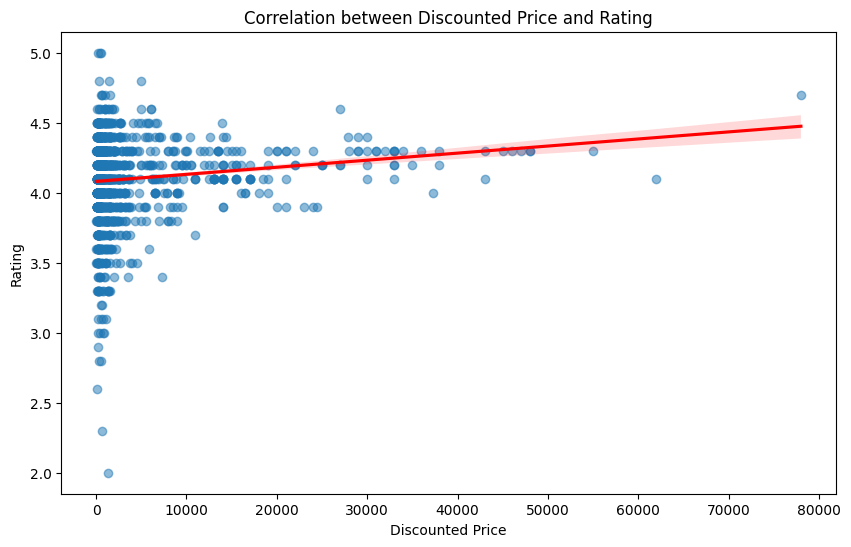

In [84]:
# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="discounted_price", y="rating", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.xlabel("Discounted Price")
plt.ylabel("Rating")
plt.title("Correlation between Discounted Price and Rating")
plt.show()

9. What are the Top 5 categories based on the highest ratings?

In [85]:

# Group by category and calculate the average rating
top_categories = df.groupby("category")["rating"].mean().reset_index()

# Sort by rating in descending order and get the top 5
top_categories = top_categories.sort_values(by="rating", ascending=False).head(5)

# Display the result
print(top_categories)

                                             category  rating
57                      Computers&Accessories|Tablets     4.6
48  Computers&Accessories|NetworkingDevices|Networ...     4.5
62   Electronics|Cameras&Photography|Accessories|Film     4.5
38            Computers&Accessories|Components|Memory     4.5
81  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


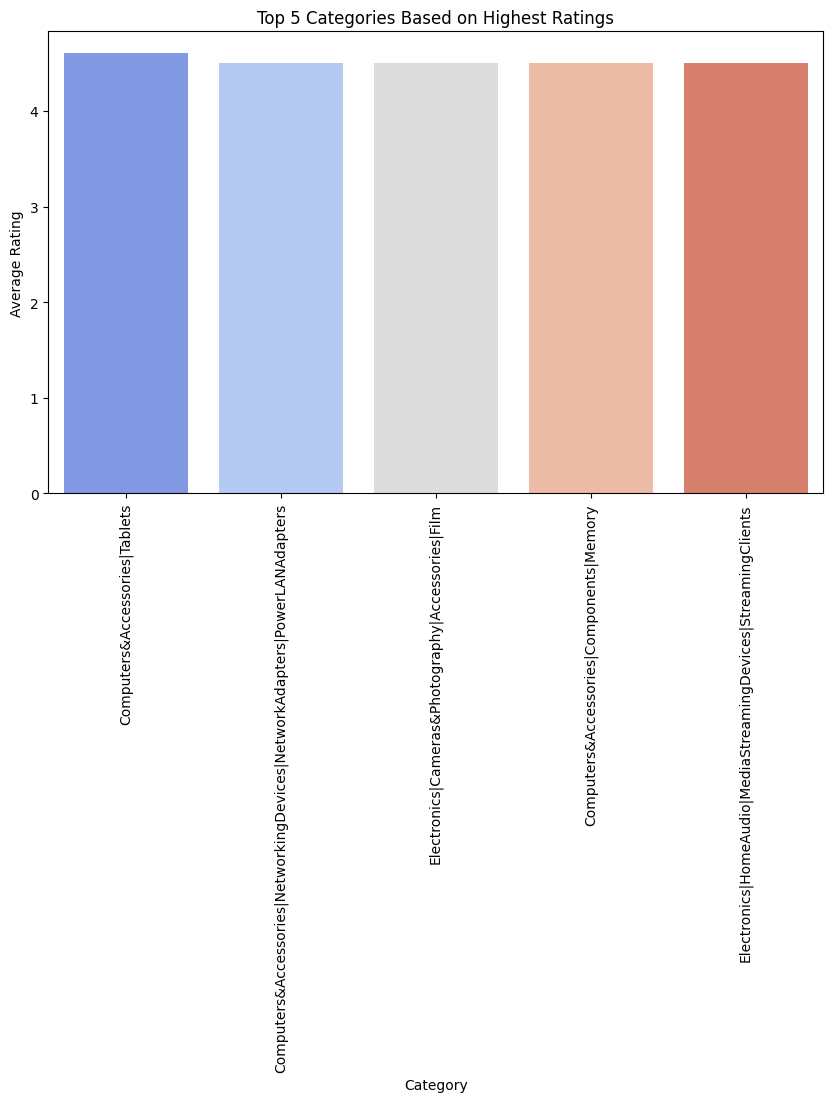

In [86]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_categories, x="category", y="rating", palette="coolwarm")

plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.title("Top 5 Categories Based on Highest Ratings")
plt.xticks(rotation=90)
plt.show()

10.Identify any potential areas for improvement or optimization based on the data analysis?

1. Data Cleaning Opportunities
Price Columns (discounted_price, actual_price) contain currency symbols (₹) and commas.

Discount Percentage includes % signs.

Rating Count has commas and needs to be converted to integers.

These columns should be cleaned and converted to appropriate numeric types for accurate analysis.

2. Category Optimization
The category column uses a long hierarchical format (e.g., Computers&Accessories|Accessories&Peripherals|Cables & Accessories|USB Cables).

This can be split into multiple levels (e.g., main_category, sub_category1, etc.) to allow better filtering and grouped analysis.

3. Redundant Columns
Columns like user_id, user_name, review_id, and img_link may not be directly useful for price or rating analysis.

Removing or separating these can reduce noise in product-focused analysis.

5. Review Analysis Potential
review_title and review_content offer opportunities for sentiment analysis or keyword extraction.

This could enhance product ranking or satisfaction insights.

EDA:4 spotify

In [87]:
df=pd.read_csv("spotify.csv")

1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful?

In [88]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [89]:
df.isna().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [90]:
df.duplicated().sum()

np.int64(27)

In [91]:
df=df.drop_duplicates()

In [92]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

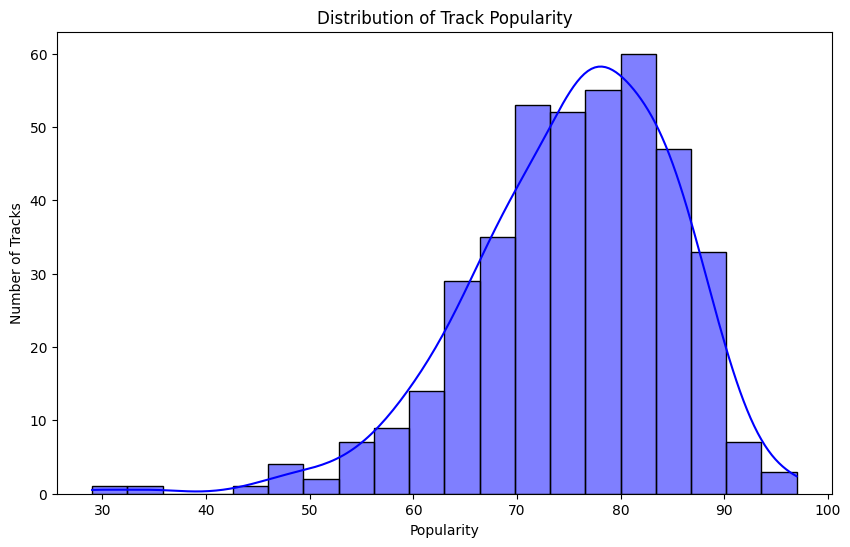

In [93]:
# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(df["Popularity"], bins=20, kde=True, color="blue")

# Labels and title
plt.xlabel("Popularity")
plt.ylabel("Number of Tracks")
plt.title("Distribution of Track Popularity")

plt.show()

3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

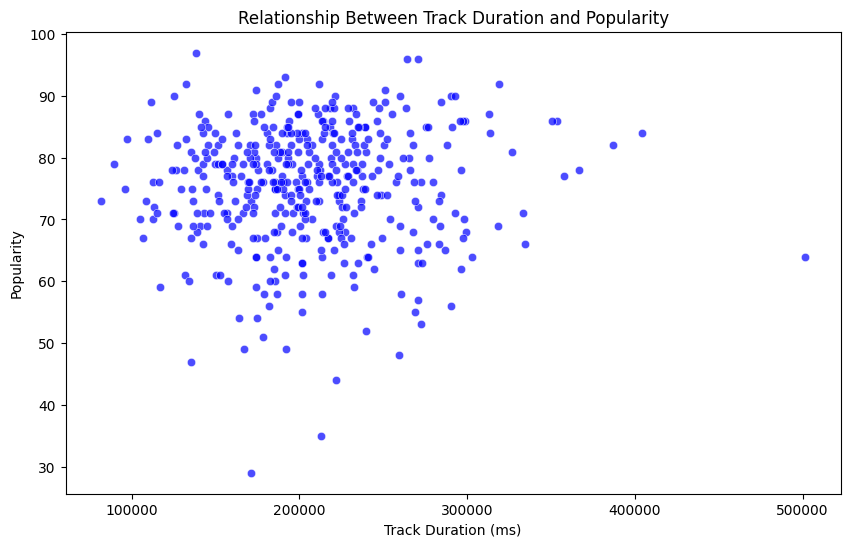

In [94]:
# Plot scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Duration (ms)"], y=df["Popularity"], alpha=0.7, color="blue")

# Labels and title
plt.xlabel("Track Duration (ms)")
plt.ylabel("Popularity")
plt.title("Relationship Between Track Duration and Popularity")

plt.show()

4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot?

In [95]:
print(df["Artist"].value_counts().idxmax())  # Outputs the artist with the highest track count

Drake


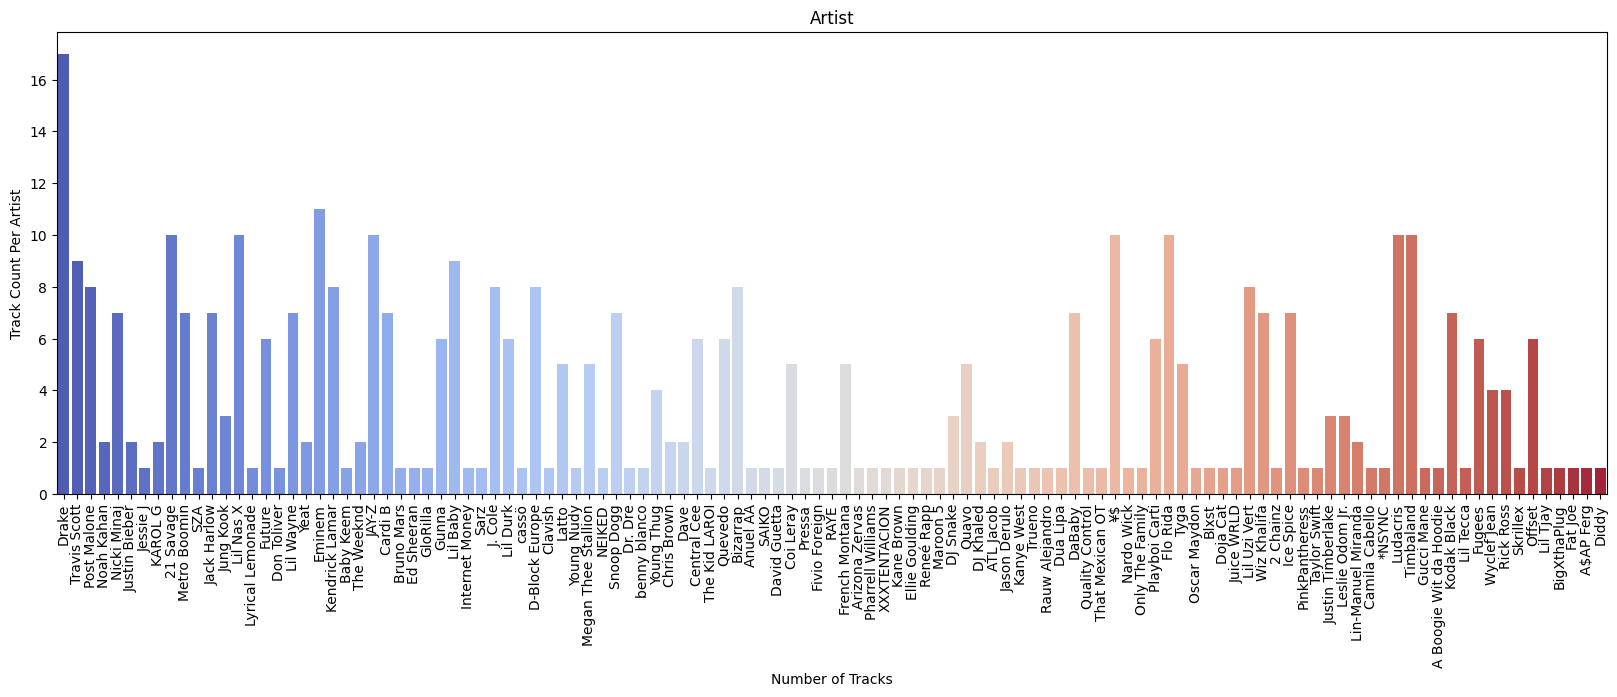

In [96]:
# Countplot of tracks per artist
plt.figure(figsize=(20,6))
sns.countplot(x=df["Artist"], palette="coolwarm")

# Labels and title
plt.xlabel("Number of Tracks")
plt.ylabel("Track Count Per Artist")
plt.title("Artist")
plt.xticks(rotation=90)

plt.show()

5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [97]:
# Get the 5 least popular tracks
least_popular_tracks = df.nsmallest(5, "Popularity")[["Artist", "Track Name"]]

print(least_popular_tracks)

             Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)


6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist?

In [98]:
# Calculate average popularity for each artist
artist_avg_popularity = df.groupby("Artist")["Popularity"].mean().sort_values(ascending=False)

# Get the top 5 most popular artists
top_5_artists = artist_avg_popularity.head(5)

print("Top 5 artists by average popularity:\n", top_5_artists)
print("\nThe most popular artist on average is:", top_5_artists.idxmax())

Top 5 artists by average popularity:
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

The most popular artist on average is: cassö


7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?

In [99]:
# Calculate average popularity per artist and get the top 5 most popular artists
top_5_artists = df.groupby("Artist")["Popularity"].mean().sort_values(ascending=False).head(5).index

# Find the most popular track for each of these top 5 artists
most_popular_tracks = {}
for artist in top_5_artists:
    top_track = df[df["Artist"] == artist].nlargest(1, "Popularity")["Track Name"].values[0]
    most_popular_tracks[artist] = top_track

# Display results
for artist, track in most_popular_tracks.items():
    print(f"{artist}: {track}")

cassö: Prada
Trueno: Mamichula - con Nicki Nicole
David Guetta: Baby Don't Hurt Me
Travis Scott: FE!N (feat. Playboi Carti)
¥$: CARNIVAL


8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

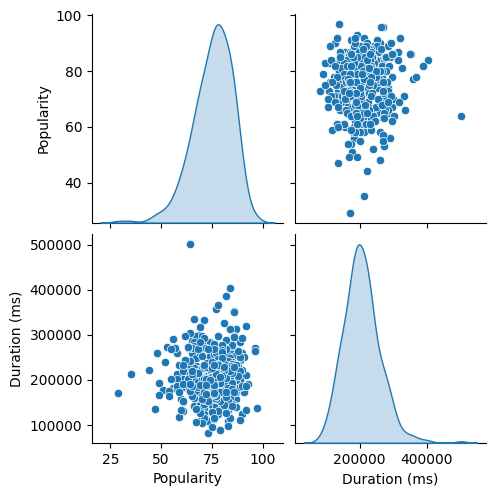

In [100]:
# Select relevant numerical columns
numeric_cols = ["Popularity", "Duration (ms)"]

# Plot the pair plot
sns.pairplot(df[numeric_cols], diag_kind="kde")
plt.show()

9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot?

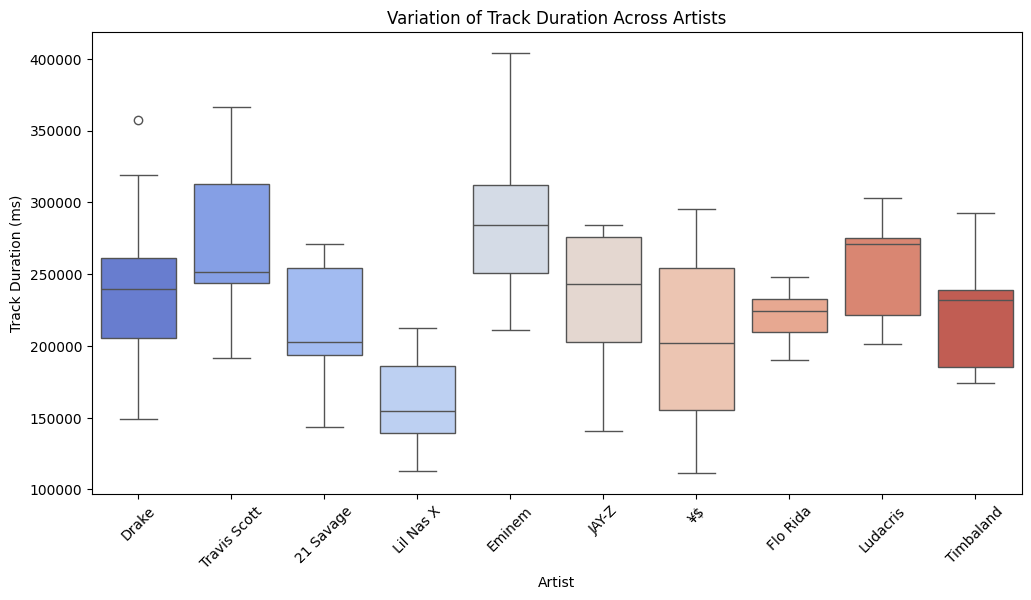

In [101]:
# Select the top 10 artists by track count for better visualization
top_artists = df["Artist"].value_counts().index[:10]
df_filtered = df[df["Artist"].isin(top_artists)]

# Create a box plot
plt.figure(figsize=(12,6))
sns.boxplot(x="Artist", y="Duration (ms)", data=df_filtered, palette="coolwarm")

# Rotate artist names for better readability
plt.xticks(rotation=45)
plt.xlabel("Artist")
plt.ylabel("Track Duration (ms)")
plt.title("Variation of Track Duration Across Artists")

plt.show()

10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

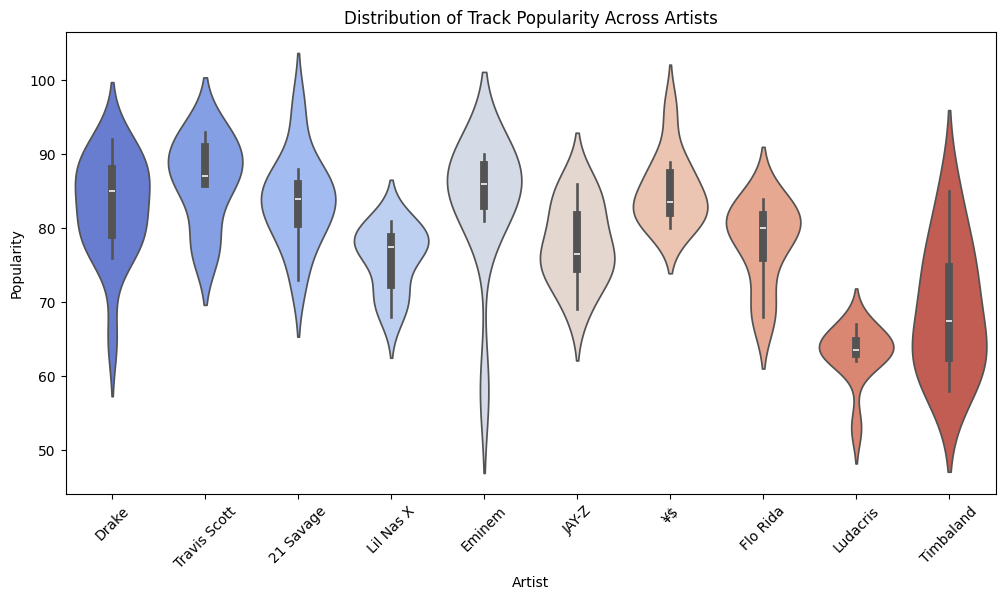

In [102]:
# Select the top 10 artists by track count for clearer visualization
top_artists = df["Artist"].value_counts().index[:10]
df_filtered = df[df["Artist"].isin(top_artists)]

# Create violin plot
plt.figure(figsize=(12,6))
sns.violinplot(x="Artist", y="Popularity", data=df_filtered, palette="coolwarm")

# Rotate artist names for better readability
plt.xticks(rotation=45)
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.title("Distribution of Track Popularity Across Artists")

plt.show()